# Get BTH, ETH price

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

start_date = "2021-08-26"
end_date = "2024-05-21"

btc_data = yf.download("BTC-USD", start=start_date, end=end_date)
eth_data = yf.download("ETH-USD", start=start_date, end=end_date)

btc_close = btc_data['Close']
eth_close = eth_data['Close']

btc_pct_change = btc_close.pct_change().fillna(0)
eth_pct_change = eth_close.pct_change().fillna(0)

btc_cum_growth = (1 + btc_pct_change).cumprod() - 1
eth_cum_growth = (1 + eth_pct_change).cumprod() - 1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Load news label

In [2]:
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cd_path = './news_data/news_with_label/cd_large.json'
cs_path = './news_data/news_with_label/cs_large.json'

with open(cd_path, 'r', encoding='utf-8') as file:
    cd_news = json.load(file)
with open(cs_path, 'r', encoding='utf-8') as file:
    cs_news = json.load(file)

cd_news_dates = []
cd_news_values = []

for news in cd_news:
    cd_news_dates.append(news["date"])
    label = news["label"]
    if label == "bullish":
        cd_news_values.append(1)
    elif label == "bearish":
        cd_news_values.append(-20)
    else:
        cd_news_values.append(0)

cs_news_dates = []
cs_news_values = []

for news in cs_news:
    if news['date'] < "2021-08-30":
        break
    cs_news_dates.append(news["date"])
    label = news["label"]
    if label == "bullish":
        cs_news_values.append(1)
    elif label == "bearish":
        cs_news_values.append(-20)
    else:
        cs_news_values.append(0)

cd_news_dates = pd.to_datetime(cd_news_dates)
cd_news_df = pd.DataFrame({'Date': cd_news_dates, 'Value': cd_news_values})
cd_news_df = cd_news_df.groupby('Date').sum().reset_index()

cs_news_dates = pd.to_datetime(cs_news_dates)
cs_news_df = pd.DataFrame({'Date': cs_news_dates, 'Value': cs_news_values})
cs_news_df = cs_news_df.groupby('Date').sum().reset_index()

# scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = StandardScaler()
cd_news_df['Standardized_Value'] = scaler.fit_transform(cd_news_df['Value'].values.reshape(-1, 1)) * 0.12
cs_news_df['Standardized_Value'] = scaler.fit_transform(cs_news_df['Value'].values.reshape(-1, 1)) * 0.12

cd_news_df["Cum_art"] = cd_news_df["Standardized_Value"].cumsum() * 0.08
cs_news_df["Cum_art"] = cs_news_df["Standardized_Value"].cumsum() * 0.03

# Plot

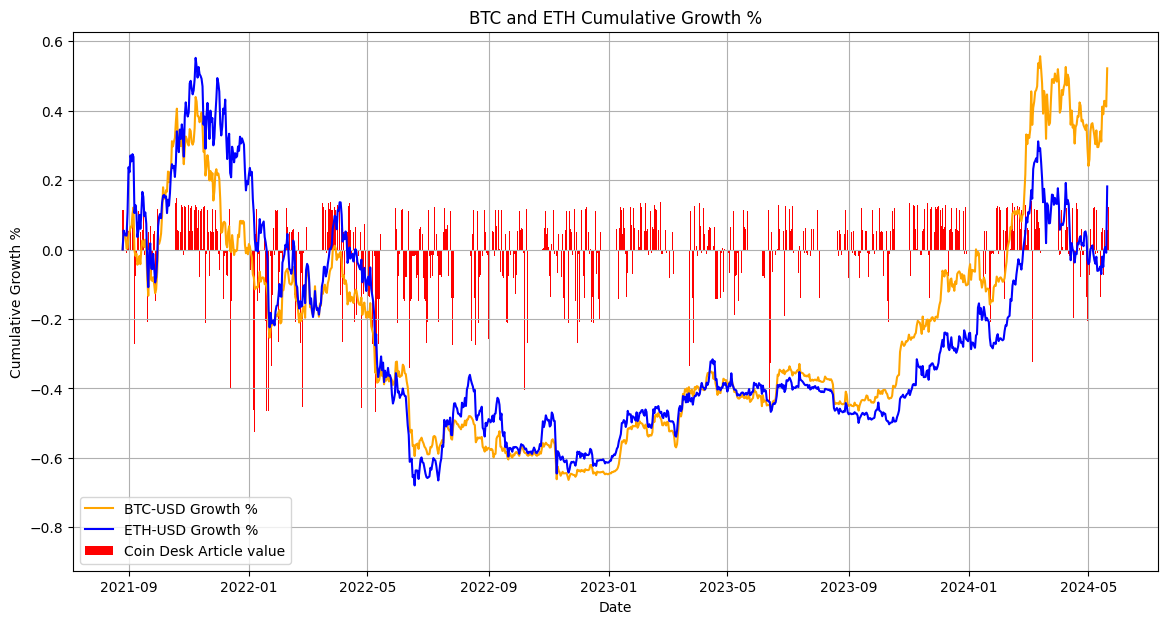

In [3]:
plt.figure(figsize=(14, 7))

plt.plot(btc_cum_growth, label='BTC-USD Growth %', color='orange')
plt.plot(eth_cum_growth, label='ETH-USD Growth %', color='blue')
plt.bar(cd_news_df['Date'], cd_news_df['Standardized_Value'], label='Coin Desk Article value', color='red')
#plt.bar(cs_news_df['Date'], cs_news_df['Standardized_Value'], label='Crypto Slate Article value', color='green')

plt.title('BTC and ETH Cumulative Growth %')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth %')
plt.legend()
plt.grid(True)
plt.show()

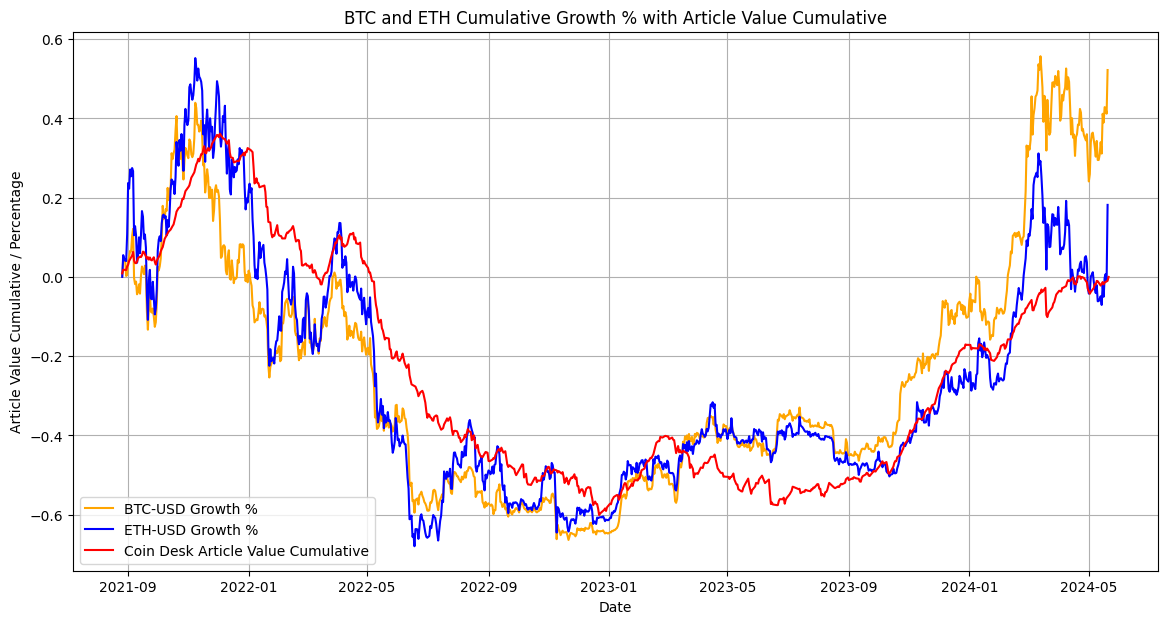

In [8]:
plt.figure(figsize=(14, 7))

plt.plot(btc_cum_growth, label='BTC-USD Growth %', color='orange')
plt.plot(eth_cum_growth, label='ETH-USD Growth %', color='blue')
plt.plot(cd_news_df['Date'], cd_news_df['Cum_art'], label='Coin Desk Article Value Cumulative', color='red')
#plt.plot(cs_news_df['Date'], cs_news_df['Cum_art'], label='Crypto Slate Article Value Cumulative', color='green')

plt.title('BTC and ETH Cumulative Growth % with Article Value Cumulative')
plt.xlabel('Date')
plt.ylabel('Article Value Cumulative / Percentage')
plt.legend()
plt.grid(True)
plt.show()

# Find proper parm 

In [5]:
btc_df = pd.DataFrame(btc_cum_growth.reset_index())
btc_df.columns = ['Date', 'Value']
eth_df = pd.DataFrame(eth_cum_growth.reset_index())
eth_df.columns = ['Date', 'Value']

In [6]:
def correlation(df):
    correlation_btc = btc_df["Value"].corr(df['Cum_art'])
    correlation_eth = eth_df["Value"].corr(df['Cum_art'])
    print(f'BTC Correlation: {correlation_btc:.3f}')
    print(f'ETH Correlation: {correlation_eth:.3f}')

In [145]:
print('Coin Desk data:')
correlation(cd_news_df)

Coin Desk data:
BTC Correlation: 0.864
ETH Correlation: 0.836
